# FACE RECOGNITION WITH YOLO

In questo notebook addestreremo l&#39;algoritmo yolox(versione di yolo più performante secondo i dati) per il riconoscimento del volto.I passi da seguire saranno:

1. Configurare YOLOX
2. Preparare il dataset Wider Face e convertirlo nel formato Pascal
3. Modificare i parametri di yolox per adattarli al dataset
4. Addestrare la rete con google colab



## 1 CONFIGURARE YOLOX

Andiamo sul sito ufficiale github di yolox e scarichiamo il codice sorgente  [https://github.com/Megvii-BaseDetection/YOLOX](https://github.com/Megvii-BaseDetection/YOLOX)


In [ ]:
pip3 install -U pip && pip3 install -r requirements.txt

pip3 install -v -e .

pip3 install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

pip3 install cython

## 2 PREPARARE IL DATASET [WIDER FACE](http://shuoyang1213.me/WIDERFACE/) E CONVERTIRLO IN [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/) 

**2.1 SCARICARE IL DATASET**

train: https://drive.google.com/file/d/15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M/view

validation: [https://drive.google.com/file/d/1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q/view](https://drive.google.com/file/d/1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q/view)

face annotations: [http://shuoyang1213.me/WIDERFACE/support/bbx\_annotation/wider\_face\_split.zip](http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip)



  **2.2. CONVERTIRLO NEL FORMATO PSCAL VOC**

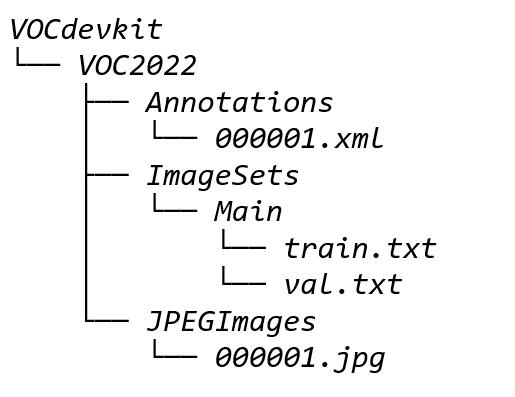

1. Inseriamo tutte le immagini sia di train che di validaation(senza cartelle)nella cartella JPEGImages
2. Le cartelle Annotations e ImageSets con i corrispettivi file verranno create con lo script convert\_to\_pascal.py disponibile al link: [https://github.com/VarCode-ai/convert-wider-dataset-to-pascal](https://github.com/VarCode-ai/convert-wider-dataset-to-pascal)



Potete scaricare l&#39;intero dataset già convertito nel formato Pascal al seguente link:



## 3. MODIFICARE I PARAMETRI DEL MODELLO YOLOX**

**3.1 Modificare il file exps/example/yolox\_voc/yolox\_voc\_s.py**

Cambiare nome degli ImageSets

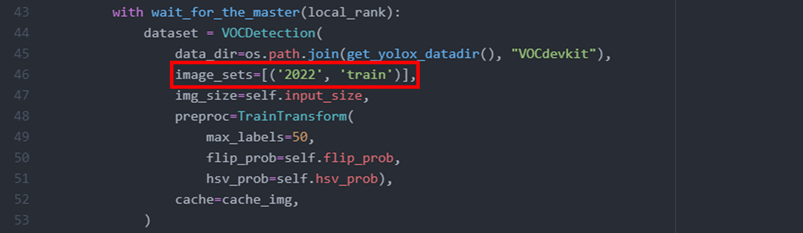

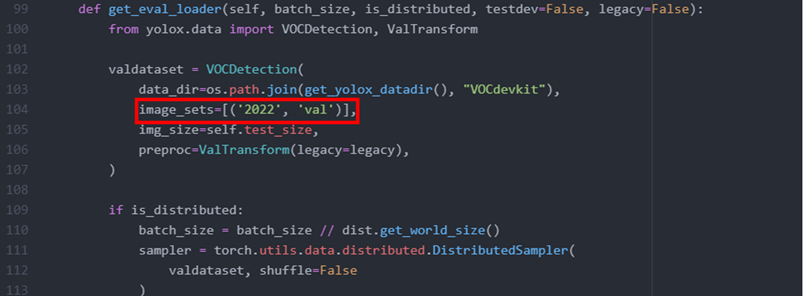

Cambiare numero di classi

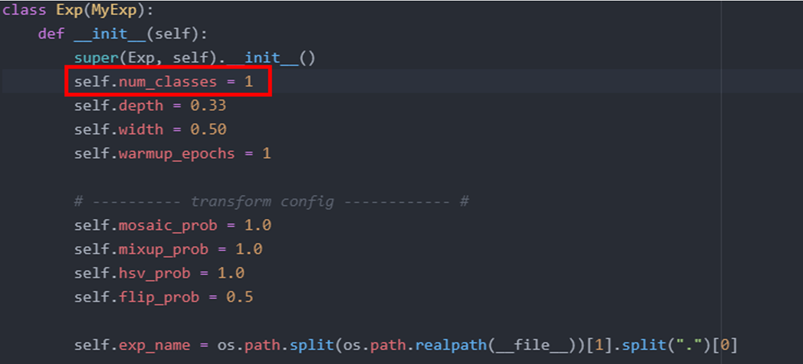

**3.2 Modificare il file yolox/data/datasets/voc_classes.py con i nomi delle nostre classi**
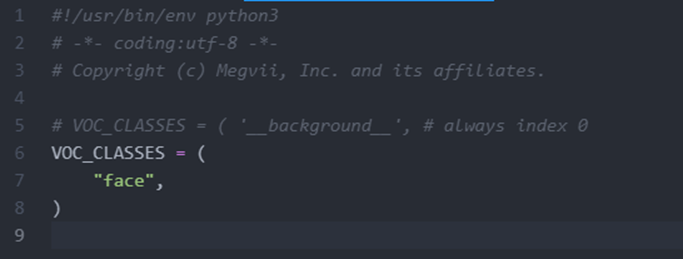

**3.3 Modificare il file tools/demo.py**
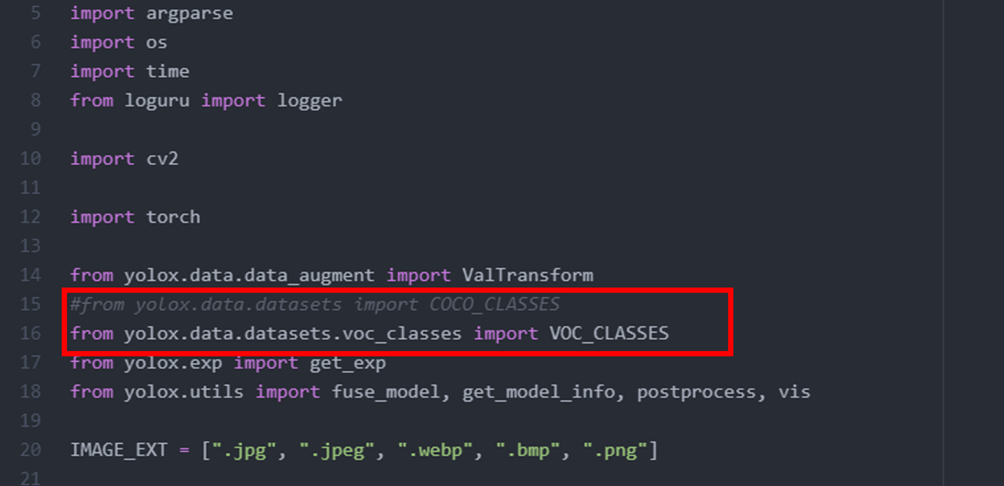

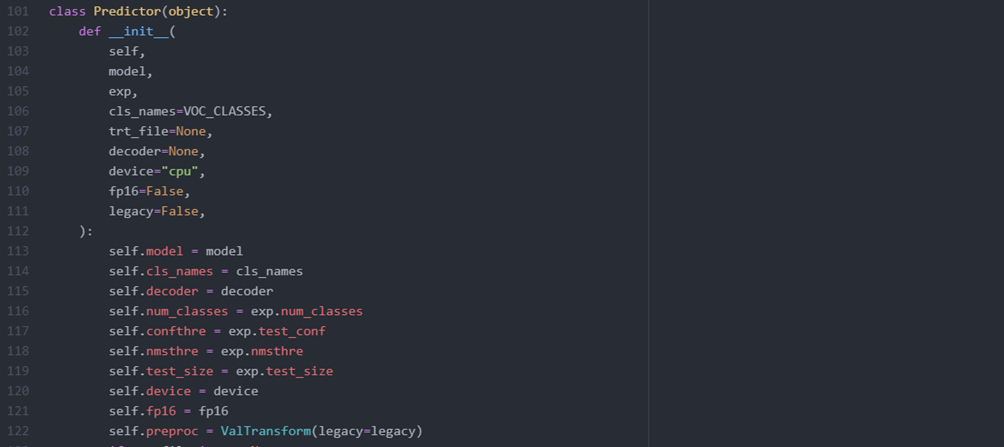

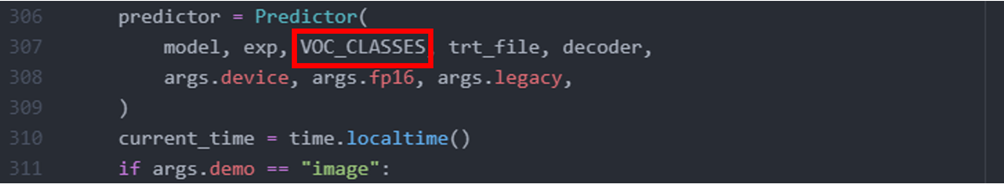

## 4. ADDESTRARE IL MODELLO
Scaricare i pesi pre-addestrati: https://github.com/Megvii-BaseDetection/YOLOX

In [ ]:
python tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 4 -c yolox_s.pth

-d Number of graphics cards used

-b Batch size

-c Load pre training model
[More info](https://yolox.readthedocs.io/en/latest/train_custom_data.html#train)

Per ripredere l'addestramento

In [ ]:
python tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 4 -c YOLOX_outputs/yolox_voc_s/latest_ckpt.pth --resume

## 5 TESTARE IL MODELLO
### IMMAGINE

In [ ]:
python tools/demo.py image -f exps/example/yolox_voc/yolox_voc_s.py -c YOLOX_outputs/yolox_voc_s/latest_ckpt.pth --path assets/001.jpg --conf 0.25 --nms 0.45 --tsize 640 --save_result --device [cpu/gpu]

### VIDEO

In [ ]:
python tools/demo.py video -f exps/example/yolox_voc/yolox_voc_s.py -c YOLOX_outputs/yolox_voc_s/latest_ckpt.pth --path assets/will_smith_slap.mp4 --conf 0.25 --nms 0.45 --tsize 640 --save_result --device [cpu/gpu]

### WEBCAM IN TEMPO REALE

In [ ]:
python tools/demo.py webcam -f exps/example/yolox_voc/yolox_voc_s.py -c YOLOX_outputs/yolox_voc_s/latest_ckpt.pth --conf 0.25 --nms 0.45 --tsize 640 --device [cpu/gpu]